In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import seaborn as sb

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Data file.xls")
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
data.keys()

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
data.shape

(209593, 37)

In [5]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
#statistics

In [8]:
data.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


#The mean is more than medin(50th percentile) in all columns

#There is a large differnce in 75% and Max

#From observing 1 and 2 there are extreme outliers are present all columns except label

In [9]:
data.label.unique()

array([0, 1], dtype=int64)

Label scores will be either 0 or 1 

In [10]:
data.payback30.unique()

array([29.        ,  0.        ,  2.33333333, ..., 56.75      ,
       64.33333333,  5.61538462])

In [11]:
data.payback90.unique()

array([29.        ,  0.        ,  2.33333333, ..., 64.33333333,
        5.23529412, 25.84615385])

In [12]:
data.medianamnt_loans30.unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [13]:
data.medianamnt_loans90.unique()

array([0. , 1. , 0.5, 2. , 1.5, 3. ])

In [14]:
data.label.value_counts()

1    183431
0     26162
Name: label, dtype: int64

Observations

Label as most value in the categories 1

# Data Visualizations

In [15]:
#checking missing value

<AxesSubplot:>

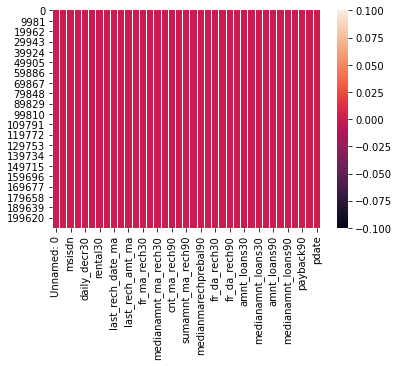

In [16]:
sb.heatmap(data.isnull())

Dataset has no missing value

To check correlation

In [17]:
datacor=data.corr()
datacor

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

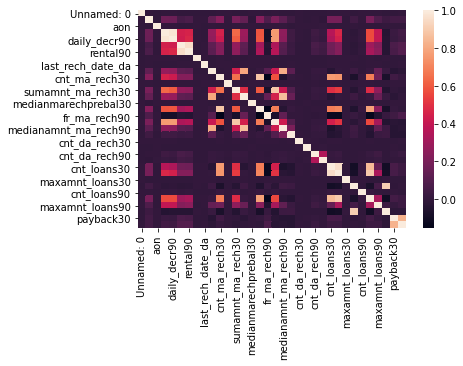

In [18]:
sb.heatmap(datacor)

<AxesSubplot:>

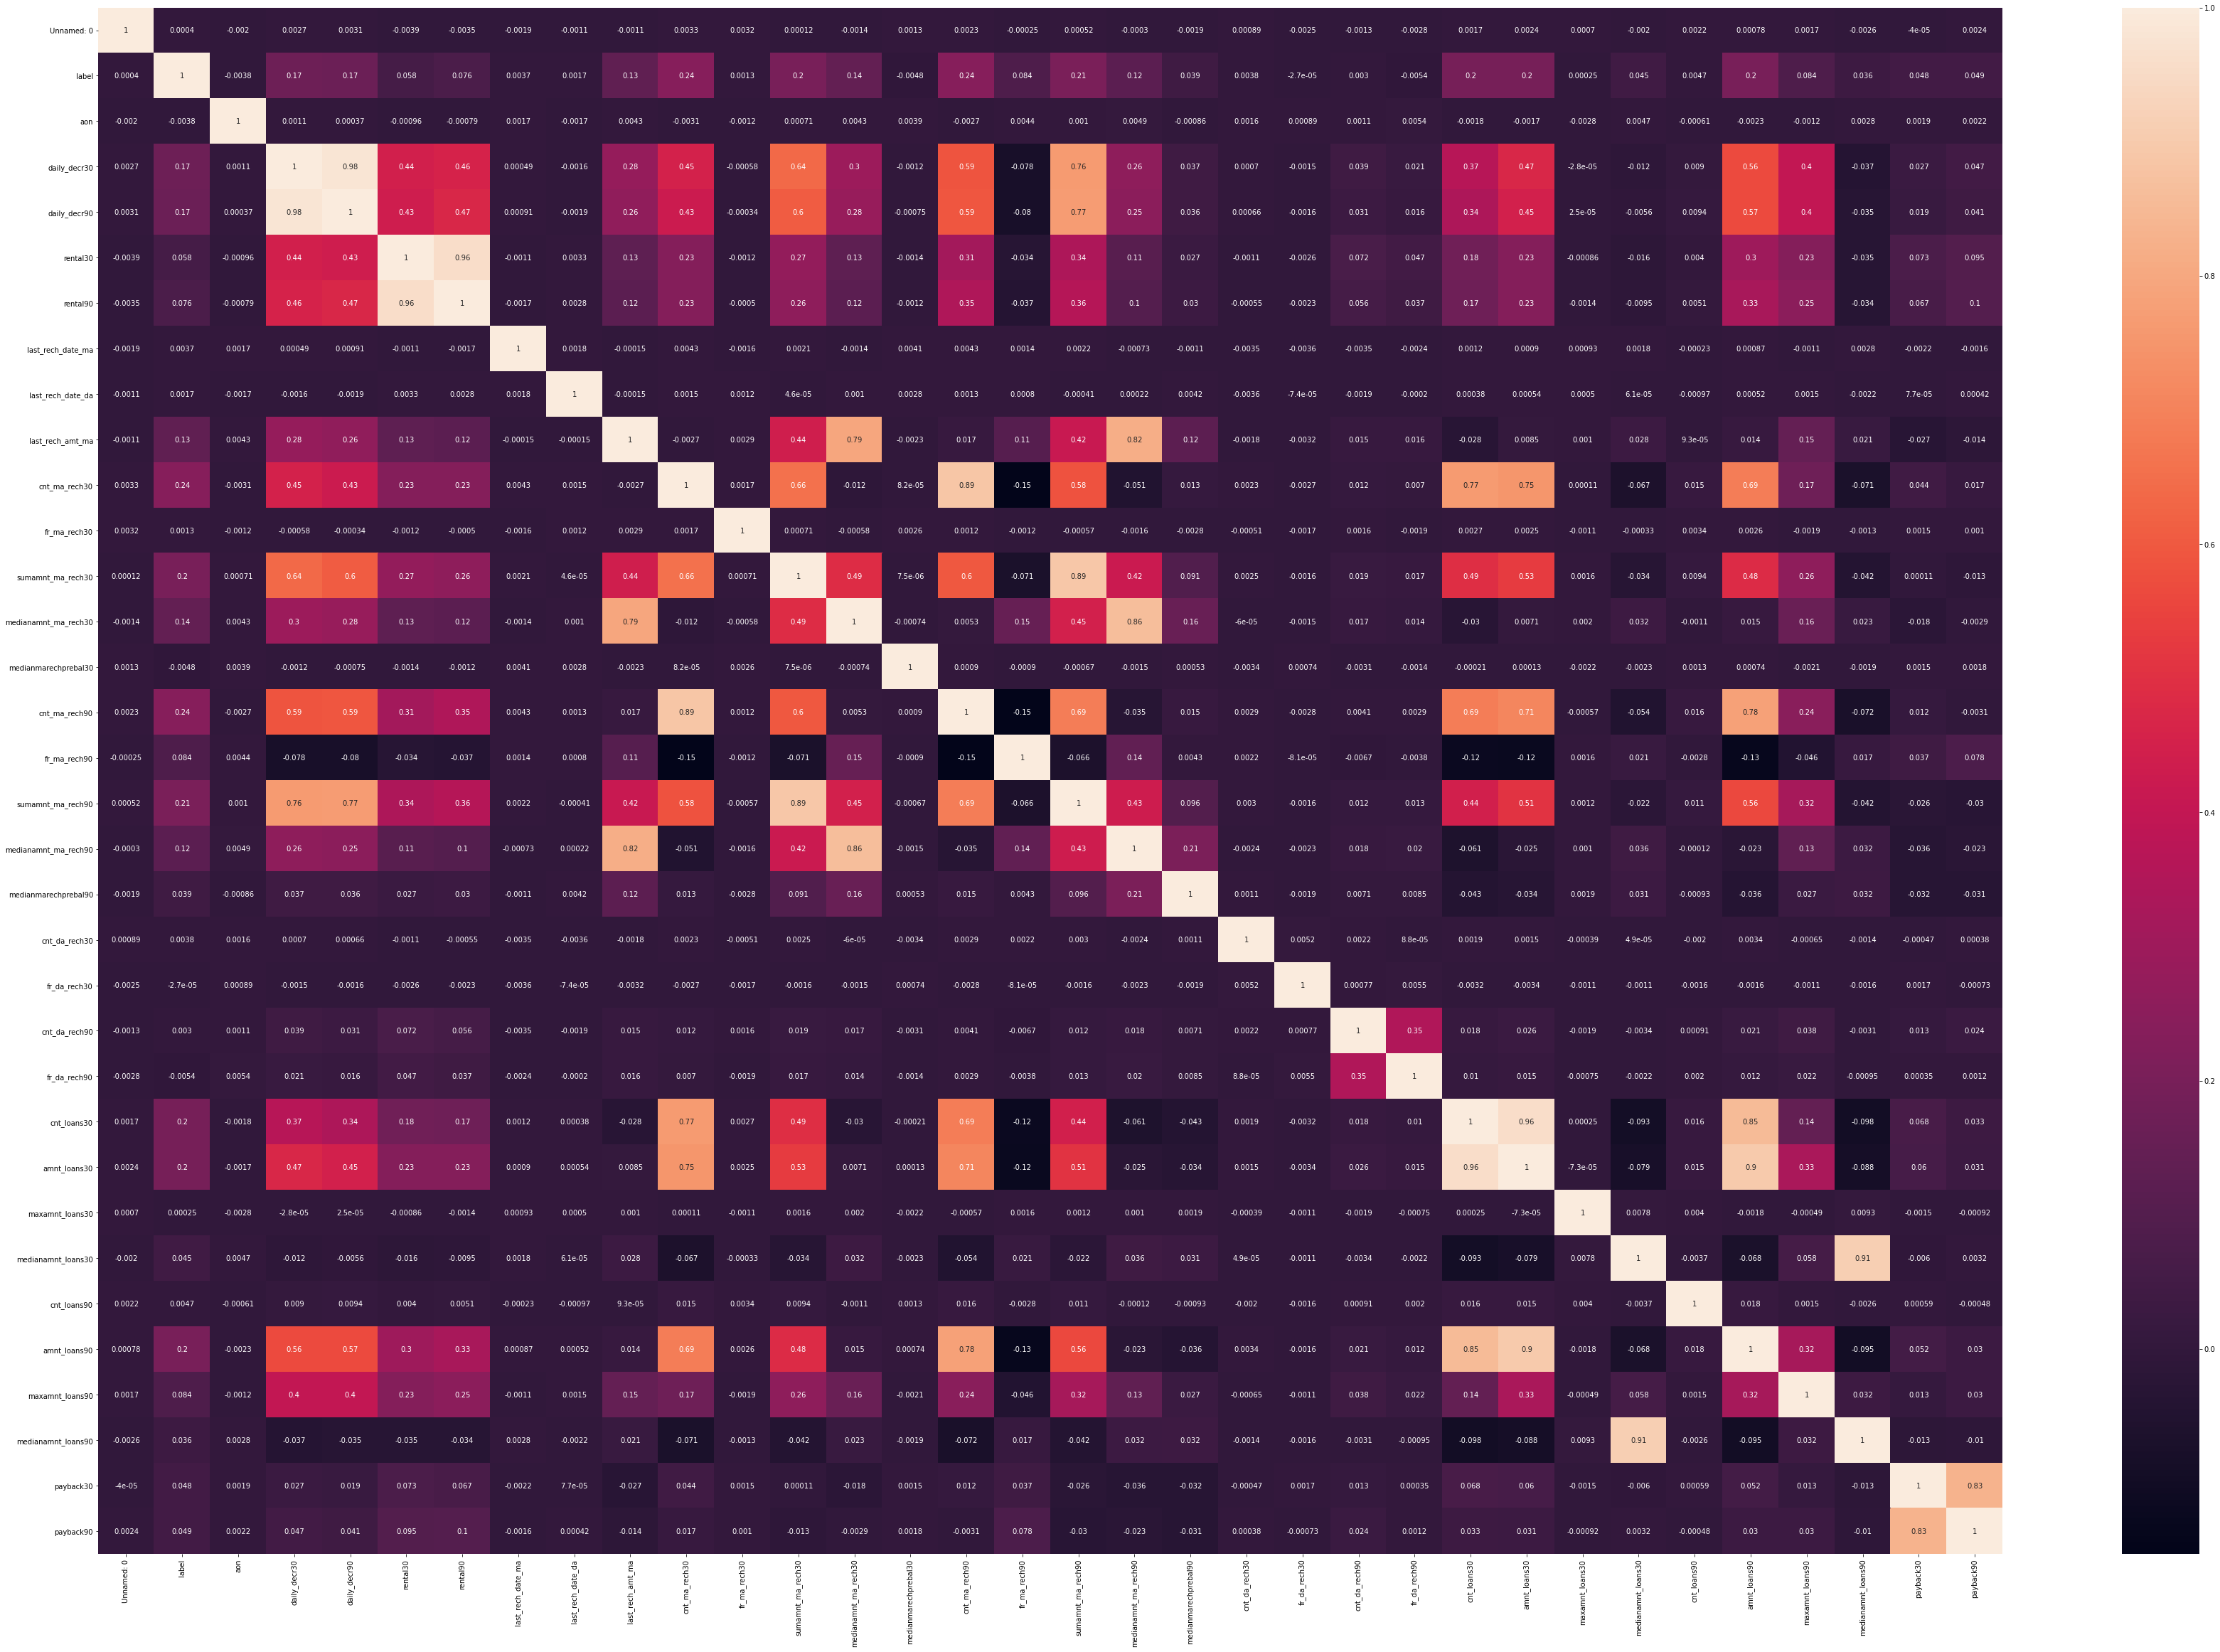

In [19]:
plt.figure(figsize=(60,40))
sb.heatmap(datacor,annot=True)

# Plotting outliers

In [20]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

<AxesSubplot:>

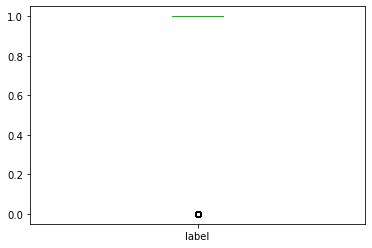

In [21]:
#univariate analysis
data["label"].plot.box()

<AxesSubplot:>

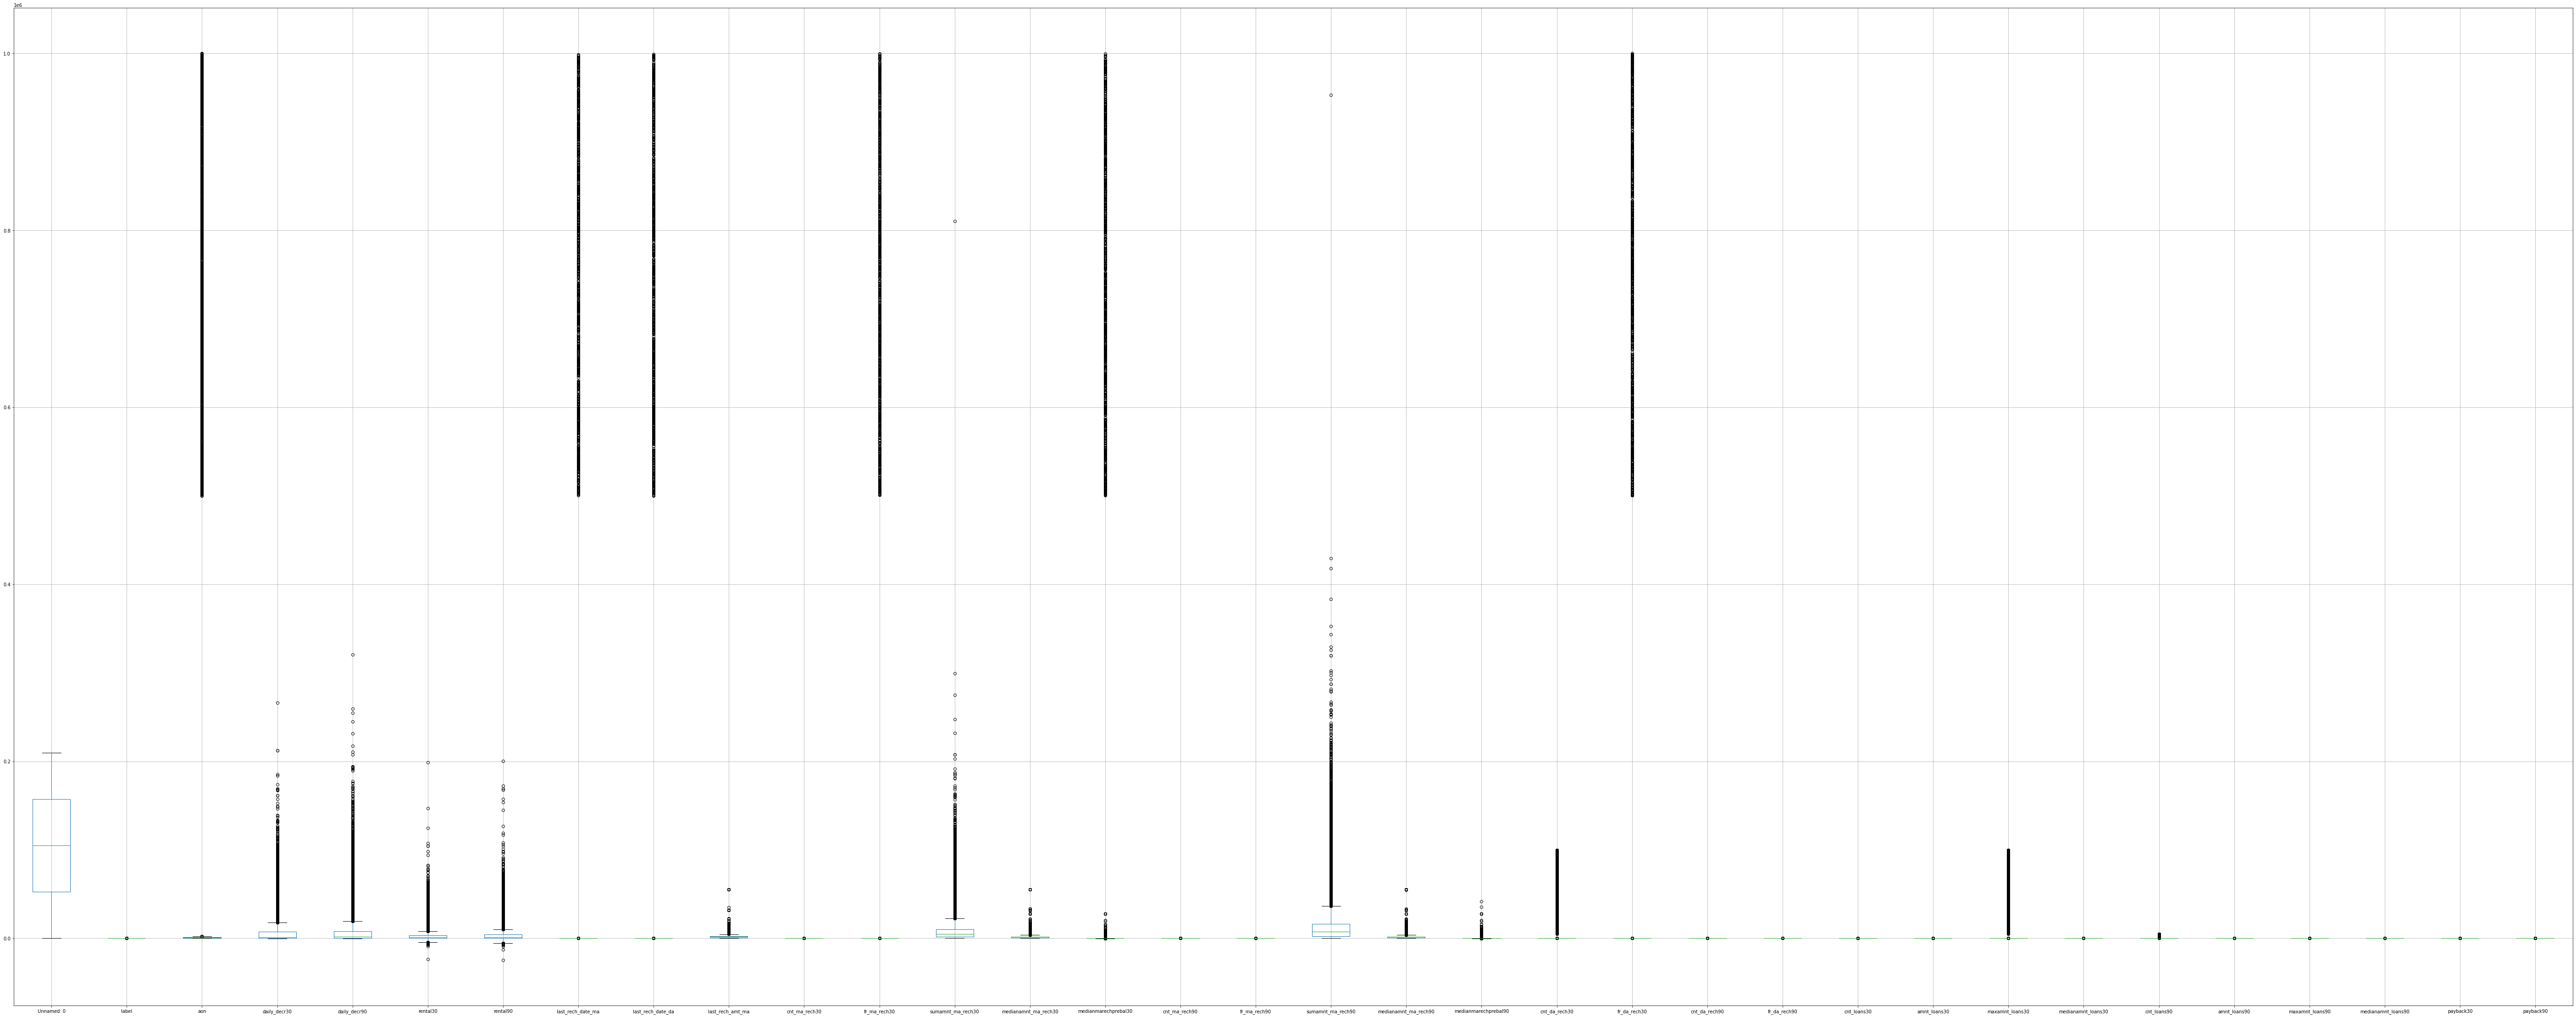

In [22]:
plt.figure(figsize=(100,40))
data.select_dtypes(include=np.number).boxplot()

In [23]:
df=data

In [24]:
df1=df.drop('pdate',axis=1)
df1

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW


In [25]:
df1.drop('pcircle',axis=1)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [26]:
datacor.columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

<AxesSubplot:>

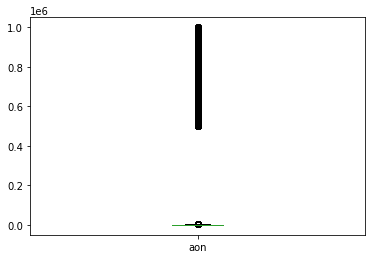

In [27]:
data["aon"].plot.box()

<AxesSubplot:>

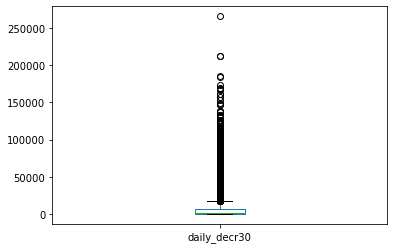

In [28]:
data["daily_decr30"].plot.box()

<AxesSubplot:>

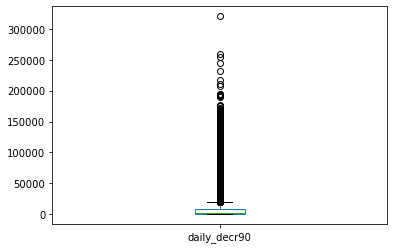

In [29]:
data["daily_decr90"].plot.box()

<AxesSubplot:>

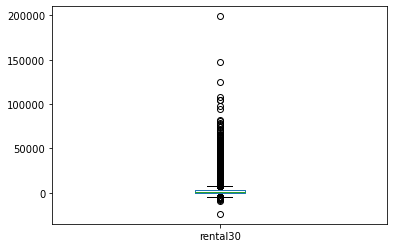

In [30]:
data["rental30"].plot.box()

<AxesSubplot:>

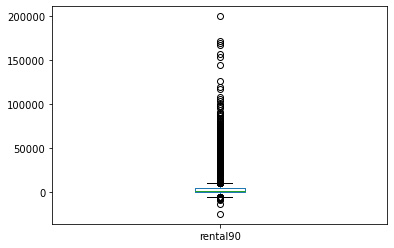

In [31]:
data["rental90"].plot.box()

<AxesSubplot:>

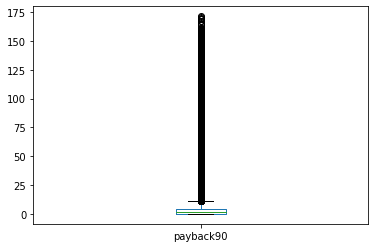

In [32]:
data["payback90"].plot.box()

<AxesSubplot:>

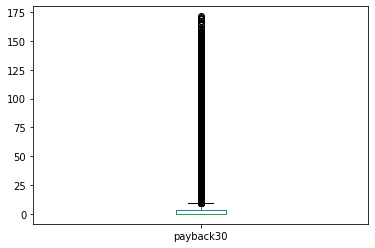

In [33]:
data["payback30"].plot.box()

# DIstribution Skewness

<AxesSubplot:xlabel='label', ylabel='Density'>

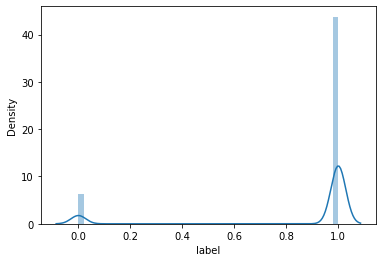

In [34]:
sb.distplot(data['label'])

<AxesSubplot:xlabel='payback90', ylabel='Density'>

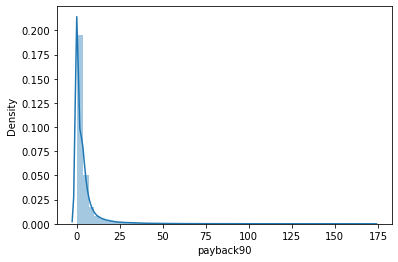

In [35]:
sb.distplot(data['payback90'])

In [36]:
#bivariate analysis

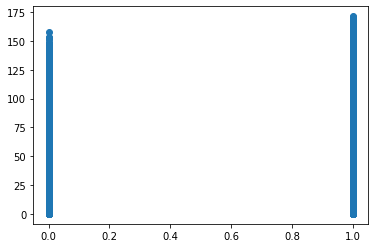

In [37]:
plt.scatter(data["label"],data["payback90"])

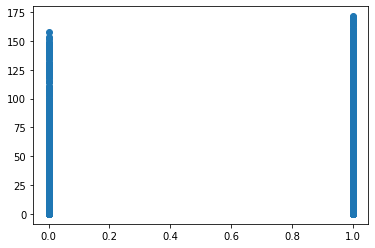

In [38]:
plt.scatter(data["label"],data["payback30"])

In [39]:
df1=data.head()

In [40]:
df1

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [41]:
#sb.pairplot(datacor)

In [42]:
df3=data.describe()
df3

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [43]:
#Outliers=[]
#def detect_outliers(data):
    
    #threshold=3
    #mean=np.mean(data)
    
    #for i in data:
        #z_score=(i-mean)/std
        #if np.abs(z_score).threshold:
            #outliers.append(i)
            
    

In [44]:
#outlier_pt=detect_outliers(df3)
#outlier_pt

In [45]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [46]:
dfd=df.drop('pcircle',axis=1)

In [47]:
dfd

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,2016-07-25


In [48]:
dfd1=dfd.drop('pdate',axis=1)
dfd1

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [49]:
dfd2=dfd1.drop('msisdn',axis=1)
dfd2

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [50]:
dfd2.dtypes

Unnamed: 0                int64
label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [51]:
data_=dfd2.astype(float)
data_

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1.0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000
1,2.0,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,...,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,3.0,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,4.0,1.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,5.0,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589.0,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,209590.0,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,...,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,209591.0,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,...,4.0,42.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,209592.0,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,...,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [52]:
data_.dtypes

Unnamed: 0              float64
label                   float64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90           float64
fr_da_rech90            float64
cnt_loans30             float64
amnt_loans30            float64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90            float64
maxamnt_loans90         float64
medianam

# Z Score

In [53]:
from scipy.stats import zscore
z=np.abs(zscore(data_))
z

array([[1.73204254, 2.64789583, 0.10357685, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.37765836, 0.09776412, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.37765836, 0.10010243, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.37765836, 0.09378769, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.37765836, 0.08428915, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.37765836, 0.08628398, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [54]:
thresehold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [55]:
z[100][31]

2.2617977009049945

In [56]:
df_new=data_[(z<3).all(axis=1)]
df_new

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1.0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000
1,2.0,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,...,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,3.0,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,...,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,4.0,1.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,5.0,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,...,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589.0,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,209590.0,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,...,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,209591.0,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,...,4.0,42.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,209592.0,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,...,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [150]:
df_new.shape

(161465, 34)

In [58]:
df_new1=df_new.drop("Unnamed: 0",axis=1)

In [59]:
df_new1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0.0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000,29.000000
1,1.0,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,1.0,...,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000,0.000000
2,1.0,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,...,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000,0.000000
3,1.0,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,0.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000,0.000000
4,1.0,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,...,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1.0,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048.0,3.0,...,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,1.000000,1.000000
209589,1.0,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773.0,4.0,...,3.0,18.0,6.0,0.0,3.0,18.0,6.0,0.0,1.000000,1.000000
209590,1.0,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539.0,5.0,...,4.0,42.0,12.0,0.0,6.0,54.0,12.0,0.0,4.000000,3.833333
209591,1.0,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773.0,5.0,...,2.0,18.0,12.0,0.0,3.0,24.0,12.0,0.0,0.000000,10.500000


In [60]:
df_new1.shape

(161465, 33)

# Linear regression

In [61]:
x=df_new1.iloc[:,1:-1]
x.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539.0,2.0,21.0,...,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787.0,1.0,0.0,...,0.0,1.0,12.0,12.0,0.0,1.0,12.0,12.0,0.0,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539.0,1.0,0.0,...,0.0,1.0,6.0,6.0,0.0,1.0,6.0,6.0,0.0,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947.0,0.0,0.0,...,0.0,2.0,12.0,6.0,0.0,2.0,12.0,6.0,0.0,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309.0,7.0,2.0,...,0.0,7.0,42.0,6.0,0.0,7.0,42.0,6.0,0.0,2.333333


In [62]:
y=df_new1.iloc[:,0]
y.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [63]:
x.shape

(161465, 31)

In [64]:
y.shape

(161465,)

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=100)

In [66]:
x_train.shape

(108181, 31)

In [67]:
y_train.shape

(108181,)

In [68]:
x_test.shape

(53284, 31)

In [69]:
y_test.shape

(53284,)

In [70]:
lm=LinearRegression()

In [71]:
lm.fit(x_train,y_train)

LinearRegression()

In [72]:
lm.coef_

array([ 4.03132629e-05, -2.93300568e-06,  3.88002980e-06, -1.94687201e-05,
        9.09994189e-06, -2.07205336e-03,  2.77683130e-04,  1.60446317e-05,
        2.04610802e-02,  4.44305249e-03, -4.57092182e-06,  1.03043654e-05,
        3.27580339e-05,  9.68495160e-03,  2.79362824e-03, -6.38615183e-07,
        1.16623418e-05,  2.06713676e-04,  1.69724313e-06, -5.16080234e-16,
        3.38199790e-02,  2.10075013e-15, -2.23423743e-03,  1.83145105e-03,
        6.42941260e-06,  5.46045477e-02,  2.65073510e-02, -4.35912115e-03,
        6.18381085e-03,  4.27037877e-02,  4.25084943e-03])

In [73]:
lm.intercept_

0.5772777865960048

In [74]:
df_new1.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [75]:
lm.score(x_train,y_train)

0.16667959501631724

In [76]:
#predicting the value

In [77]:
pred=lm.predict(x_test)
print("predicted result ",pred)
print("actual result ",y_test)

predicted result  [0.9684075  0.85466724 0.99496533 ... 0.72047998 0.81108991 0.63404808]
actual result  404       1.0
45190     1.0
203651    1.0
162940    1.0
123197    1.0
         ... 
149078    1.0
185562    1.0
202499    1.0
191732    1.0
60388     0.0
Name: label, Length: 53284, dtype: float64


In [78]:
print("error:")

print("mean absolute error",mean_absolute_error(y_test,pred))
print("mean squared error:",mean_squared_error(y_test,pred))
print("Root mean Squared error",np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error 0.21903698333310048
mean squared error: 0.09968539926310466
Root mean Squared error 0.31572994673154564


In [79]:
#R2 Score
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.16159622746329094


In [80]:
predict=lm.predict(x_test)
print(predict)

[0.9684075  0.85466724 0.99496533 ... 0.72047998 0.81108991 0.63404808]


In [81]:
pred1=predict.astype(int)

In [82]:
pred1

array([0, 0, 0, ..., 0, 0, 0])

In [83]:
print("Accuracy Score:",accuracy_score(y_test,pred1))

Accuracy Score: 0.2846820809248555


In [84]:
print("Confusion Matrix:",confusion_matrix(y_test,pred1))

Confusion Matrix: [[ 7194   155]
 [37960  7975]]


In [85]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

         0.0       0.16      0.98      0.27      7349
         1.0       0.98      0.17      0.30     45935

    accuracy                           0.28     53284
   macro avg       0.57      0.58      0.28     53284
weighted avg       0.87      0.28      0.29     53284



# Algorithms

In [86]:
gnb=GaussianNB()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=100)

In [87]:
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6398543652878913
[[ 6254  1095]
 [18095 27840]]
              precision    recall  f1-score   support

         0.0       0.26      0.85      0.39      7349
         1.0       0.96      0.61      0.74     45935

    accuracy                           0.64     53284
   macro avg       0.61      0.73      0.57     53284
weighted avg       0.86      0.64      0.70     53284



In [151]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8641806170707905
[[  216  7133]
 [  104 45831]]
              precision    recall  f1-score   support

         0.0       0.68      0.03      0.06      7349
         1.0       0.87      1.00      0.93     45935

    accuracy                           0.86     53284
   macro avg       0.77      0.51      0.49     53284
weighted avg       0.84      0.86      0.81     53284



In [88]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8542526837324526
[[ 3648  3701]
 [ 4065 41870]]
              precision    recall  f1-score   support

         0.0       0.47      0.50      0.48      7349
         1.0       0.92      0.91      0.92     45935

    accuracy                           0.85     53284
   macro avg       0.70      0.70      0.70     53284
weighted avg       0.86      0.85      0.86     53284



In [89]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8729449741010434
[[ 2824  4525]
 [ 2245 43690]]
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45      7349
         1.0       0.91      0.95      0.93     45935

    accuracy                           0.87     53284
   macro avg       0.73      0.67      0.69     53284
weighted avg       0.86      0.87      0.86     53284



# L1 AND L2 REGRESSION

In [90]:
from sklearn.linear_model import Lasso,Ridge

In [91]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.16664646036897146

In [92]:
ls.coef_

array([ 4.03559464e-05, -2.72989463e-06,  3.68429588e-06, -1.94609656e-05,
        9.09062684e-06, -2.07151000e-03,  4.15832156e-04,  1.60402757e-05,
        2.04013385e-02,  4.44696187e-03, -4.55312036e-06,  1.03077526e-05,
        3.29950914e-05,  9.72801755e-03,  2.79568427e-03, -6.52265479e-07,
        1.17064137e-05,  2.07188903e-04,  1.67499126e-06,  0.00000000e+00,
        2.41531791e-02,  0.00000000e+00,  9.35000660e-03, -8.06579355e-05,
        6.44176078e-06,  5.11570460e-02,  1.32892863e-02, -2.17804249e-03,
        5.69095727e-03,  2.92053099e-02,  4.25611321e-03])

In [93]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.16664646036897146

In [94]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.16667959501631713

In [95]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
enr.fit(x_train,y_train)
enrpred=enr.predict(x_test)
print(enr.score(x_train,y_train))
enr.coef_

0.16666432304089773


array([ 4.03389148e-05, -2.72041636e-06,  3.68458932e-06, -1.94685243e-05,
        9.09994473e-06, -2.07206100e-03,  3.48460946e-04,  1.60407882e-05,
        2.04018090e-02,  4.44541391e-03, -4.56037433e-06,  1.02988984e-05,
        3.29048630e-05,  9.72792908e-03,  2.79475982e-03, -6.48933396e-07,
        1.16951250e-05,  2.06947659e-04,  1.68764273e-06,  0.00000000e+00,
        2.88669407e-02,  0.00000000e+00,  1.02809707e-02, -2.30296518e-04,
        6.43788308e-06,  5.24499033e-02,  1.34652119e-02, -2.20730435e-03,
        5.94928505e-03,  3.60534011e-02,  4.25121525e-03])

In [96]:
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.6398543652878913
[[ 6254  1095]
 [18095 27840]]
              precision    recall  f1-score   support

         0.0       0.26      0.85      0.39      7349
         1.0       0.96      0.61      0.74     45935

    accuracy                           0.64     53284
   macro avg       0.61      0.73      0.57     53284
weighted avg       0.86      0.64      0.70     53284



In [97]:
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train))
pred_gnb=gnb.predict(x_test)

0.6411939249960714


In [98]:
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
pred_dtc=dtc.predict(x_test)

0.9996764681413557


In [152]:
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
pred_knn=knn.predict(x_test)

0.9049370961629122


In [100]:
x_train.shape

(108181, 31)

In [101]:
y_train.shape

(108181,)

# Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.64221348 0.64205865 0.64208962 0.639891   0.64342117]
0.6419347846282475 0.0011404742864718311


In [153]:
svcscore= cross_val_score(svc,x,y,cv=2)
print(svcscore)
print(svcscore.mean(),svcscore.std())

[0.86315385 0.86296636]
0.8630601053246989 9.374749880580735e-05


In [103]:
dtcscore = cross_val_score(dtc,x,y,cv=5)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())

[0.85925742 0.85996965 0.85693494 0.85786393 0.857802  ]
0.8583655900659586 0.0010940237186635663


In [ ]:
dtcscore = cross_val_score(dtc,x,y,cv=1)
print(dtcscore)
print(dtcscore.mean(),dtcscore.std())

In [104]:
knnscore= cross_val_score(knn,x,y,cv=5)
print(knnscore)
print(knnscore.mean(),knnscore.std())

[0.87631995 0.8732233  0.87356393 0.8736878  0.87446196]
0.8742513857492336 0.0011108978642522932


# AUC ROC CURVE

In [105]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [106]:
lg.fit(x_train,y_train)

LogisticRegression()

In [107]:
lg.coef_

array([[ 4.97110474e-04, -2.36061750e-02,  2.35641839e-02,
        -1.79165577e-04,  6.75940376e-05, -7.73670762e-03,
         1.20200069e-03,  1.12438701e-04,  2.59805507e-03,
         6.97461407e-03,  2.40734695e-04, -9.77818266e-05,
         8.87745728e-04,  3.55600116e-03,  1.60605035e-02,
        -3.66768937e-05,  5.20267652e-06,  2.43317221e-03,
         1.02772623e-04,  0.00000000e+00,  4.32544740e-05,
         0.00000000e+00,  2.47042437e-03,  1.46349508e-02,
         1.49304579e-04,  4.38687807e-05,  2.89018045e-03,
         1.71555325e-02,  3.63604183e-03,  3.81029192e-05,
         4.81801225e-03]])

In [108]:
lg.intercept_

array([0.00061463])

In [109]:
lg.score(x_train,y_train)

0.8635250182564406

In [154]:
y_pred_prob=lg.predict_proba(x_test)[:,1]

In [111]:
y_pred_prob

array([0.92488971, 0.90081017, 0.98253496, ..., 0.54659726, 0.63890968,
       0.58641776])

In [112]:
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)

In [113]:
fpr

array([0.        , 0.        , 0.        , ..., 0.99986393, 0.99986393,
       1.        ])

In [114]:
tpr

array([0.        , 0.0877109 , 0.08869054, ..., 0.99997823, 1.        ,
       1.        ])

In [115]:
threseholds

array([2.        , 1.        , 1.        , ..., 0.21816446, 0.18811656,
       0.17141057])

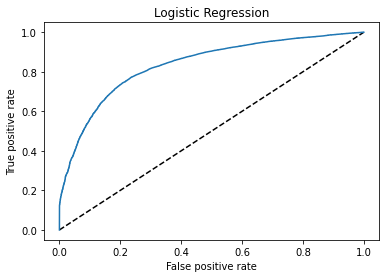

In [116]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="LogisticRegression")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Logistic Regression")
plt.show()

In [117]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))

In [118]:
auc_score

0.5257207781298283

In [119]:
dtc

DecisionTreeClassifier()

In [120]:
dtc.fit(x_train,y_train)
p=dtc.predict(x_test)
print(accuracy_score(y_test,p))

0.8540837774941821


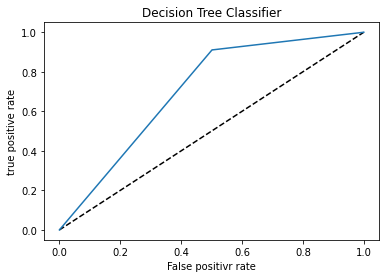

In [121]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.xlabel("False positivr rate")
plt.ylabel("true positive rate")
plt.title("Decision Tree Classifier")
plt.show()

In [155]:
auc_score=roc_auc_score(y_test,dtc.predict(x_test))

In [123]:
auc_sco

0.7047090359405102

In [124]:
knn

KNeighborsClassifier()

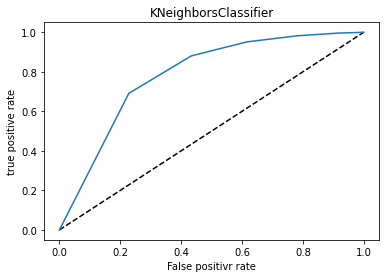

In [125]:
#KNeighborsClassifier curve
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="KNeighborsClassifier")
plt.xlabel("False positivr rate")
plt.ylabel("true positive rate")
plt.title("KNeighborsClassifier")
plt.show()

In [126]:
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

0.6676982803132975

In [127]:
gnb

GaussianNB()

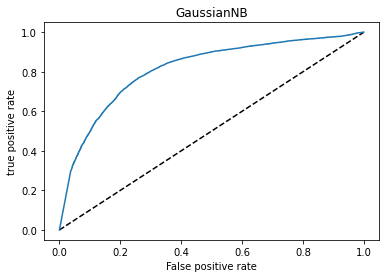

In [128]:
#GaussianNB curve
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="GaussianNB")
plt.xlabel("False positive rate")
plt.ylabel("true positive rate")
plt.title("GaussianNB")
plt.show()

In [129]:
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

0.7285369680038127

In [130]:
#svc

In [131]:
#GaussianNB curve
#y_pred_prob=svc.predict_proba(x_test)[:,1]
#fpr,tpr,threseholds=roc_curve(y_test,y_pred_prob)
#plt.plot([0,1],[0,1],"k--")
#plt.plot(fpr,tpr,label="GaussianNB")
#plt.xlabel("False positivr rate")
#plt.ylabel("true positive rate")
#plt.title("GaussianNB")
#plt.show()

In [132]:
#auc_score=roc_auc_score(y_test,svc.predict(x_test))
#auc_score

# Ensemble Classiefier

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=150,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.9056940169656933
[[ 3440  3909]
 [ 1116 44819]]
              precision    recall  f1-score   support

         0.0       0.76      0.47      0.58      7349
         1.0       0.92      0.98      0.95     45935

    accuracy                           0.91     53284
   macro avg       0.84      0.72      0.76     53284
weighted avg       0.90      0.91      0.90     53284



In [134]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=rf.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9056940169656933
[[ 3440  3909]
 [ 1116 44819]]
              precision    recall  f1-score   support

         0.0       0.76      0.47      0.58      7349
         1.0       0.92      0.98      0.95     45935

    accuracy                           0.91     53284
   macro avg       0.84      0.72      0.76     53284
weighted avg       0.90      0.91      0.90     53284



In [135]:
ad=AdaBoostClassifier(n_estimators=150)
ad.fit(x_train,y_train)
ad_pred=rf.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9056940169656933
[[ 3440  3909]
 [ 1116 44819]]
              precision    recall  f1-score   support

         0.0       0.76      0.47      0.58      7349
         1.0       0.92      0.98      0.95     45935

    accuracy                           0.91     53284
   macro avg       0.84      0.72      0.76     53284
weighted avg       0.90      0.91      0.90     53284



In [136]:
#svc=SVC(random_state=0,tol=1e-5)
#ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm="SAMME")
#ad.fit(x_train,y_train)
#ad_pred=rf.predict(x_test)
#print(accuracy_score(y_test,ad_pred))
#print(confusion_matrix(y_test,ad_pred))
#print(classification_report(y_test,ad_pred))


In [156]:

ad=AdaBoostClassifier(n_estimators=50,base_estimator=dtc,algorithm="SAMME")
ad.fit(x_train,y_train)
ad_pred=rf.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.9056940169656933
[[ 3440  3909]
 [ 1116 44819]]
              precision    recall  f1-score   support

         0.0       0.76      0.47      0.58      7349
         1.0       0.92      0.98      0.95     45935

    accuracy                           0.91     53284
   macro avg       0.84      0.72      0.76     53284
weighted avg       0.90      0.91      0.90     53284



In [137]:
#svc=SVC(probability=True,kernel="linear",random_state=0,tol=1e-5)
#ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc)
#ad.fit(x_train,y_train)
#ad_pred=rf.predict(x_test)
#print(accuracy_score(y_test,ad_pred))
#print(confusion_matrix(y_test,ad_pred))
#print(classification_report(y_test,ad_pred))


In [138]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.9021094512423993
[[ 2876  4473]
 [  743 45192]]
              precision    recall  f1-score   support

         0.0       0.79      0.39      0.52      7349
         1.0       0.91      0.98      0.95     45935

    accuracy                           0.90     53284
   macro avg       0.85      0.69      0.73     53284
weighted avg       0.89      0.90      0.89     53284



# Hyper Parameter

In [139]:
x.shape

(161465, 31)

In [140]:
y.shape

(161465,)

In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
from scipy.stats import randint
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV



In [142]:
dtc

DecisionTreeClassifier()

In [143]:
param_dist={"max_depth":[3,None],
          "max_features": randint(1,9),
          "min_samples_leaf":randint(1,9),
          "criterion":["gini","entropy"]}

In [144]:
dtc_cv = RandomizedSearchCV(dtc, param_dist, cv = 5)
dtc_cv.fit(x,y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026707A891C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026707A89460>})

In [145]:
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}
Best score is 0.8933019539838355


In [146]:
print(dtc_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 8}


In [147]:
print(dtc_cv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=5,
                       min_samples_leaf=8)


In [148]:
dtc_cv_predictions = dtc_cv.predict(x)

In [149]:
print(classification_report(y,dtc_cv_predictions))

              precision    recall  f1-score   support

         0.0       0.88      0.27      0.41     22400
         1.0       0.89      0.99      0.94    139065

    accuracy                           0.89    161465
   macro avg       0.89      0.63      0.68    161465
weighted avg       0.89      0.89      0.87    161465

